In [1]:
# standard imports
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# natural language processing: n-gram ranking
import re
import nltk
import unicodedata
from nltk.corpus import stopwords

In [2]:
# store all stopwords
additional_stopwords = []
stopwords = nltk.corpus.stopwords.words('english') + additional_stopwords

In [3]:
# function to cleanup text and find words in it
def extract_words_from_text(text):
    """
    Function to clean up the passed text.\n
    All words that are not designated as a stop word are lemmatized afte encoding and basic regex parsing is performed.\n
    \n
    Parameters:
    text - Text to be worked with
    """

    # lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()

    # text cleaning
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()

    # word list
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
# function to cleanup text and find words in it
def find_ngrams(words, source):
    """
    Function to find 1/2/3 grams from passed word list.\n
    \n
    Parameters:
    words - Word list to be worked with
    """

    for i in range(1, 4):
        if i == 3:
            series = (pd.Series(nltk.ngrams(words, i)).value_counts())[:10]
        else:
            series = (pd.Series(nltk.ngrams(words, i)).value_counts())[:25]
        
        # print as text
        print(f"{i}-grams:")
        print(series)

        # show plot
        series.sort_values().plot.barh(width=.8, figsize=(20, 15))
        plt.title(f'Most Frequently Occuring {i}-grams from {source}')
        plt.ylabel(f'{i}-gram')
        plt.xlabel('No. of Occurances')
        plt.show()

### Getting Page Content

In [5]:
# getting page content
html_response = requests.get("https://www.glamourmagazine.co.uk/gallery/spring-summer-2022-fashion-trends")
html_text = html_response.text
soup = BeautifulSoup(html_text, "lxml")

In [6]:
# various sources of text
para_text = [element.text.strip() for element in soup.find_all("p")]
header_text = [element.text.strip() for element in soup.find_all(["h1", "h2", "h3", "h4", "h5", "h6"])]
span_text = [element.text.strip() for element in soup.find_all("span")]
all_text = para_text + header_text + span_text

### All Text

1-grams:
(fashion,)     18
(well,)        15
(season,)      15
(spotted,)     14
(lr,)          14
(trend,)       12
(next,)        11
(week,)         9
(summer,)       9
(may,)          9
(one,)          8
(u,)            7
(skirt,)        7
(charlie,)      7
(wardrobe,)     7
(teather,)      7
(fabric,)       6
(uk,)           6
(super,)        6
(cutout,)       6
(knit,)         6
(mini,)         6
(2022,)         6
(youre,)        6
(pleated,)      6
dtype: int64


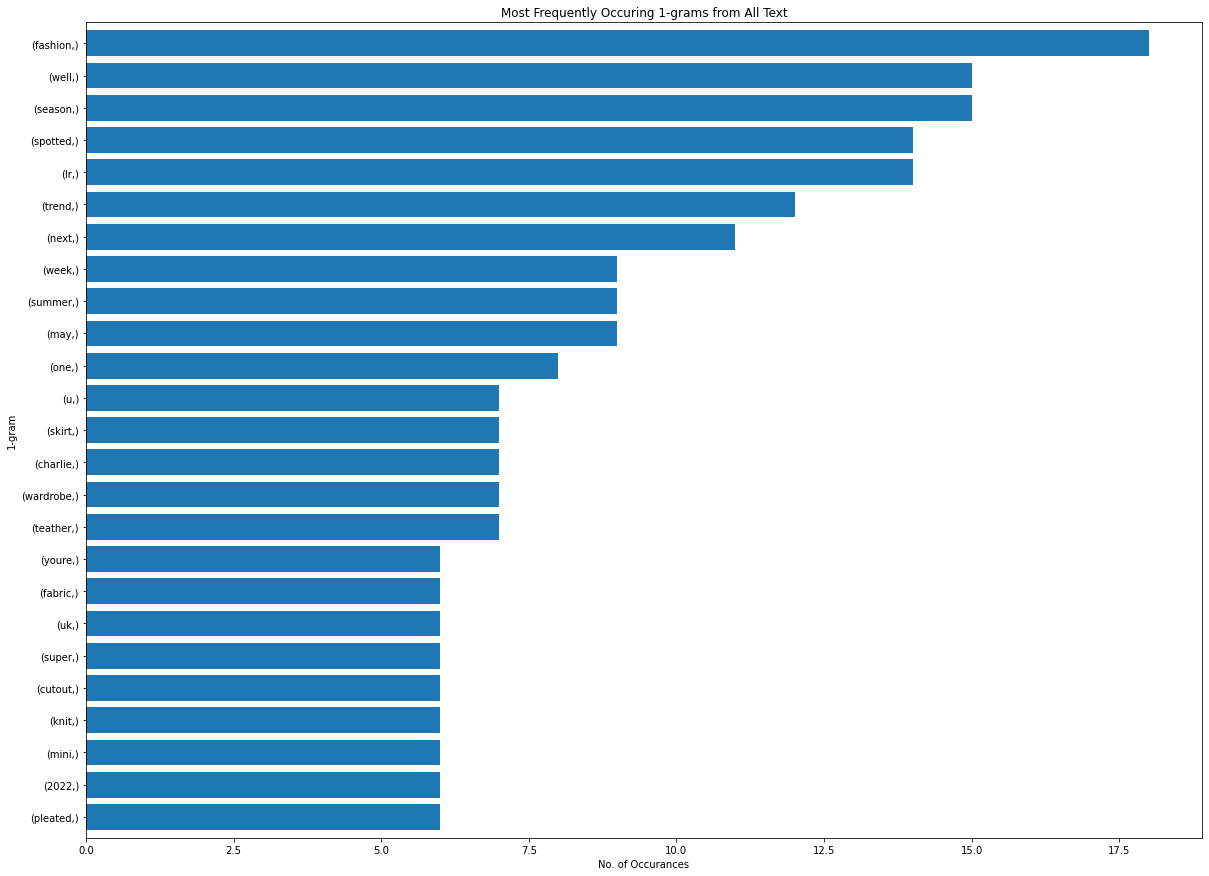

2-grams:
(spotted, lr)              14
(next, season)              9
(charlie, teather)          7
(fashion, week)             6
(david, koma)               5
(nensi, dojaka)             4
(lowslung, waist)           4
(pleated, skirt)            4
(super, sheer)              4
(rejina, pyo)               3
(season, see)               3
(michael, kor)              3
(yuhan, wang)               3
(lr, elleme)                3
(fashion, trend)            3
(tom, ford)                 3
(liquid, metal)             3
(supriya, lele)             3
(whole, lot)                3
(jonathan, simkhai)         3
(feminine, underwear)       2
(strap, highlighter)        2
(mini, white)               2
(white, suiting)            2
(suiting, accessorised)     2
dtype: int64


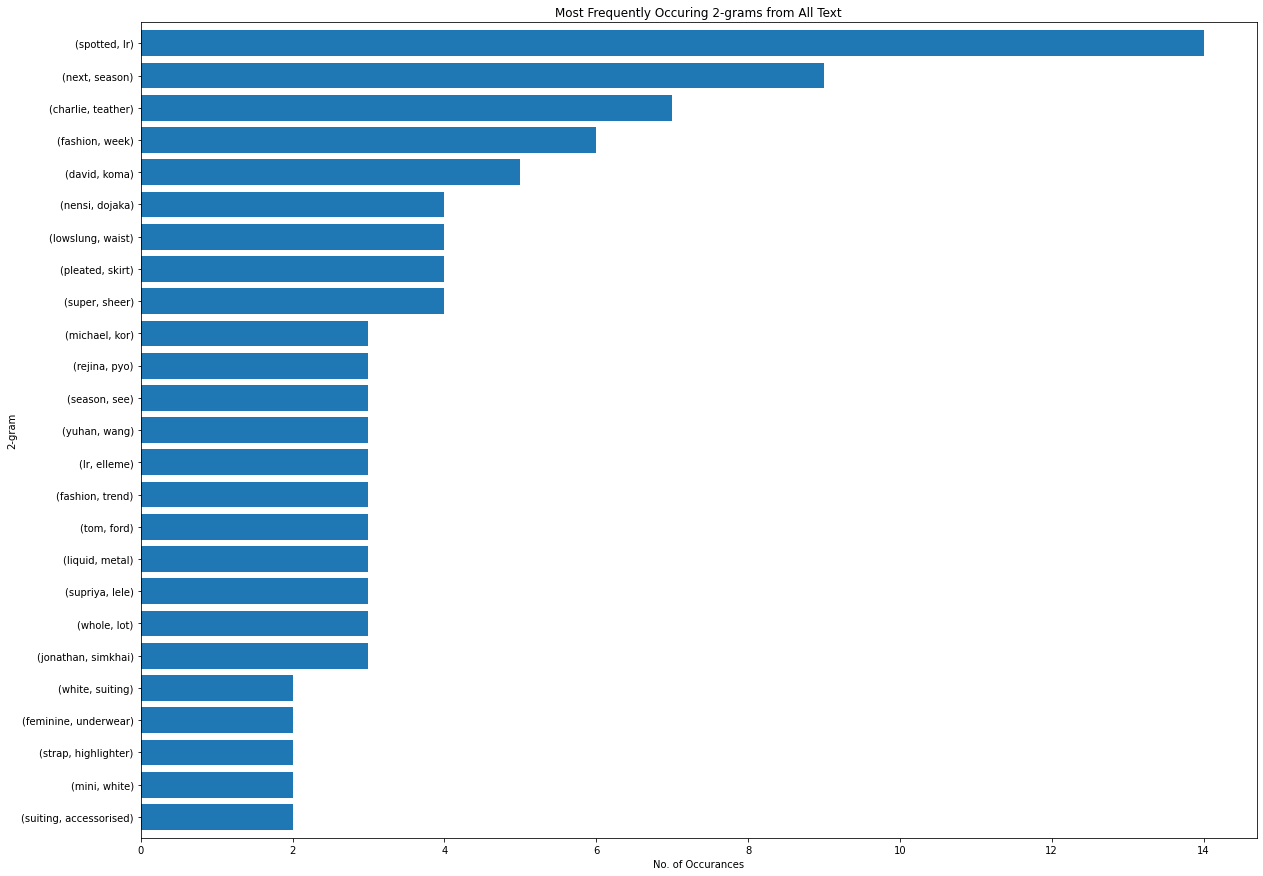

3-grams:
(spotted, lr, elleme)          3
(next, season, see)            3
(cutout, hyper, feminine)      2
(metal, super, sheer)          2
(supriya, lele, well)          2
(teather, charlie, teather)    2
(charlie, teather, charlie)    2
(super, sheer, fabric)         2
(00s, lowslung, waist)         2
(yuhan, wang, david)           2
dtype: int64


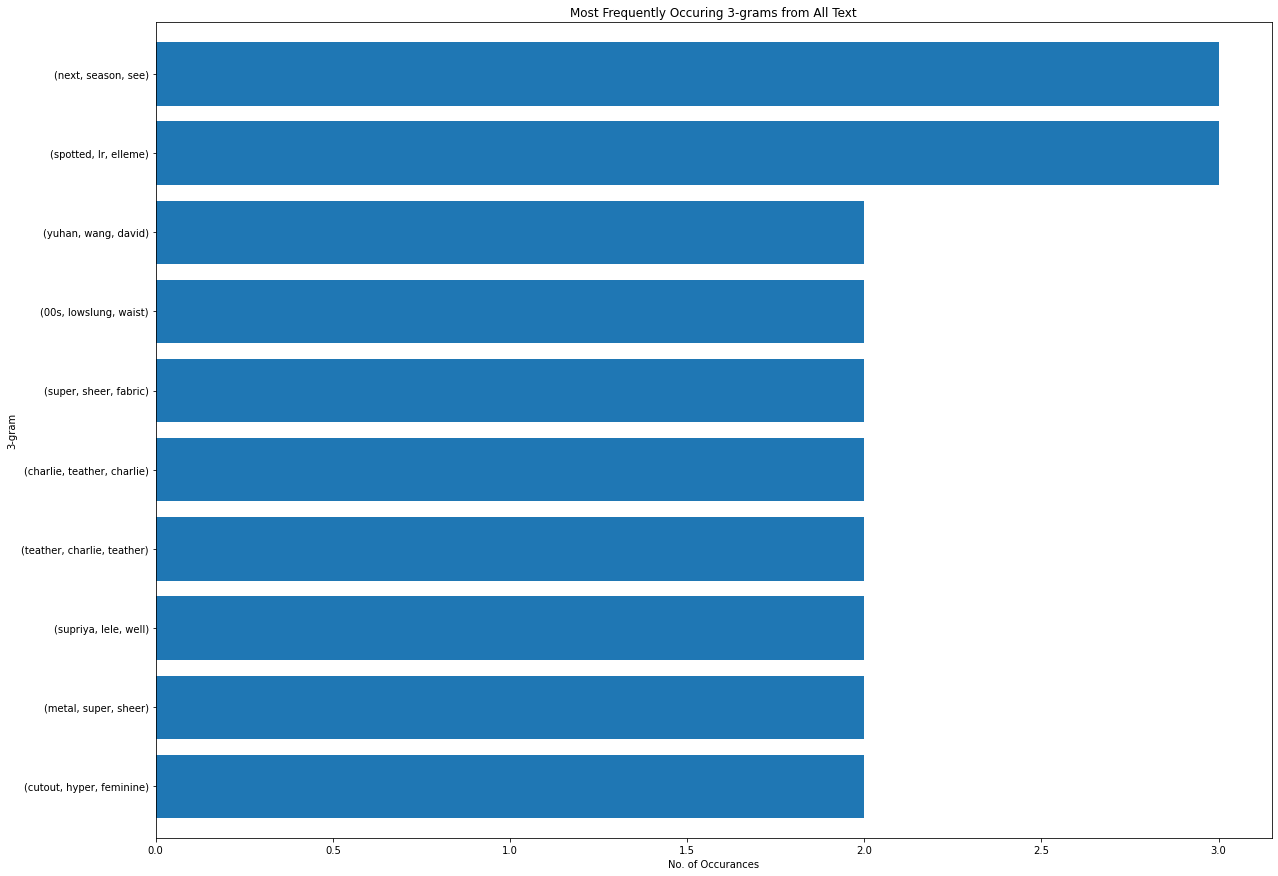

In [7]:
# ngrams based on all text
words = extract_words_from_text(text=" ".join(all_text))
find_ngrams(words=words, source="All Text")

### Paragraph Text

1-grams:
(well,)        15
(season,)      14
(spotted,)     14
(lr,)          14
(next,)        11
(may,)          9
(summer,)       9
(trend,)        8
(one,)          8
(u,)            7
(fashion,)      7
(wardrobe,)     6
(fabric,)       6
(youre,)        6
(koma,)         5
(david,)        5
(look,)         5
(spring,)       5
(skirt,)        5
(whole,)        5
(see,)          5
(2022,)         5
(elleme,)       5
(recent,)       4
(pleated,)      4
dtype: int64


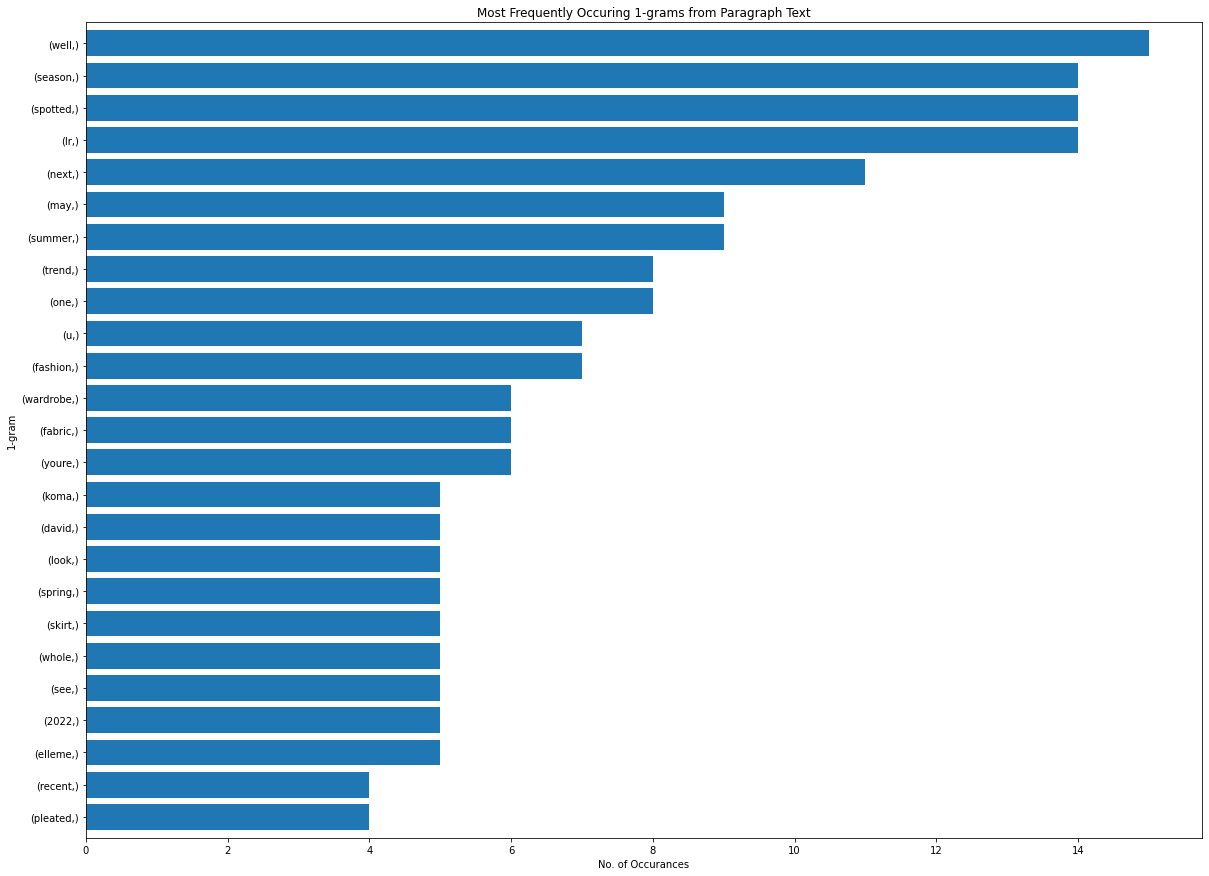

2-grams:
(spotted, lr)          14
(next, season)          9
(david, koma)           5
(nensi, dojaka)         4
(michael, kor)          3
(whole, lot)            3
(supriya, lele)         3
(tom, ford)             3
(jonathan, simkhai)     3
(rejina, pyo)           3
(season, see)           3
(charlie, teather)      3
(lr, elleme)            3
(yuhan, wang)           3
(paul, joe)             2
(richard, quinn)        2
(look, set)             2
(skirt, may)            2
(lele, well)            2
(super, sheer)          2
(sheer, fabric)         2
(00s, lowslung)         2
(lowslung, waist)       2
(come, spring)          2
(there, trend)          2
dtype: int64


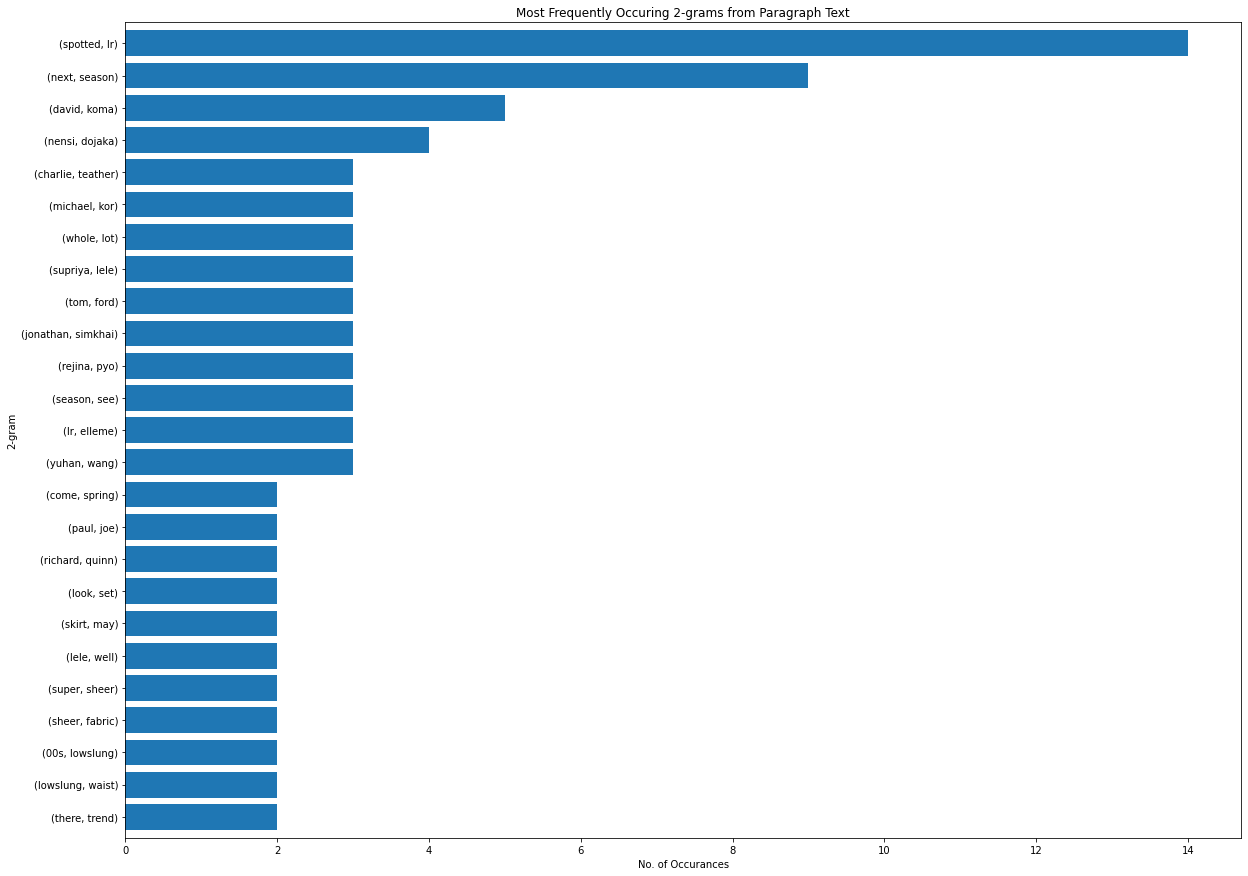

3-grams:
(next, season, see)             3
(spotted, lr, elleme)           3
(yuhan, wang, david)            2
(supriya, lele, well)           2
(lr, elleme, rejina)            2
(elleme, rejina, pyo)           2
(super, sheer, fabric)          2
(00s, lowslung, waist)          2
(wang, david, koma)             2
(fairweather, knit, grownup)    1
dtype: int64


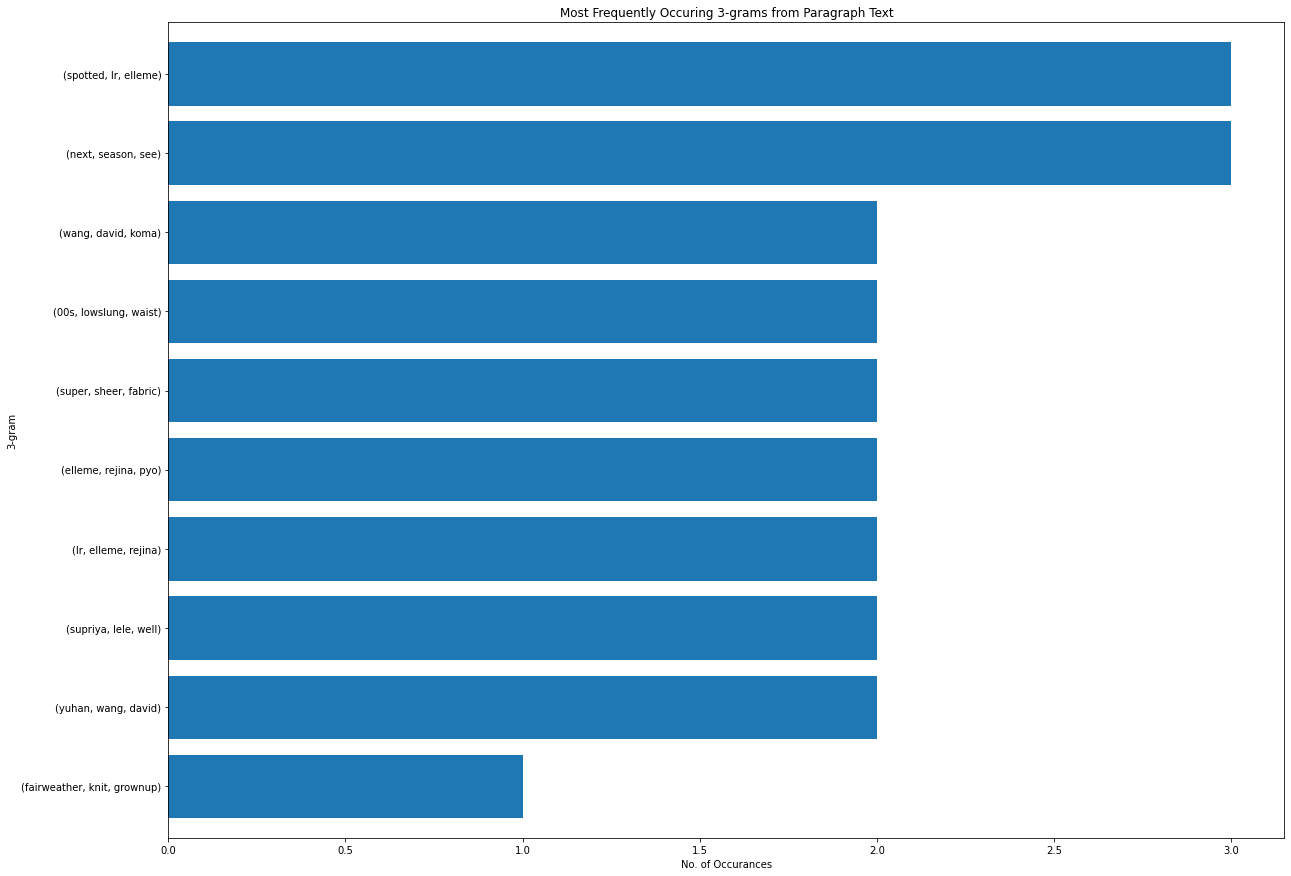

In [8]:
# ngrams based on para text
words = extract_words_from_text(text=" ".join(para_text))
find_ngrams(words=words, source="Paragraph Text")

### Header Text

1-grams:
(fashion,)         2
(trend,)           2
(yellow,)          1
(ultramini,)       1
(mini,)            1
(white,)           1
(suiting,)         1
(accessorised,)    1
(leg,)             1
(strap,)           1
(highlighter,)     1
(14,)              1
(sheer,)           1
(knit,)            1
(cutout,)          1
(hyper,)           1
(feminine,)        1
(underwear,)       1
(outerwear,)       1
(bulky,)           1
(netted,)          1
(super,)           1
(metal,)           1
(liquid,)          1
(everywhere,)      1
dtype: int64


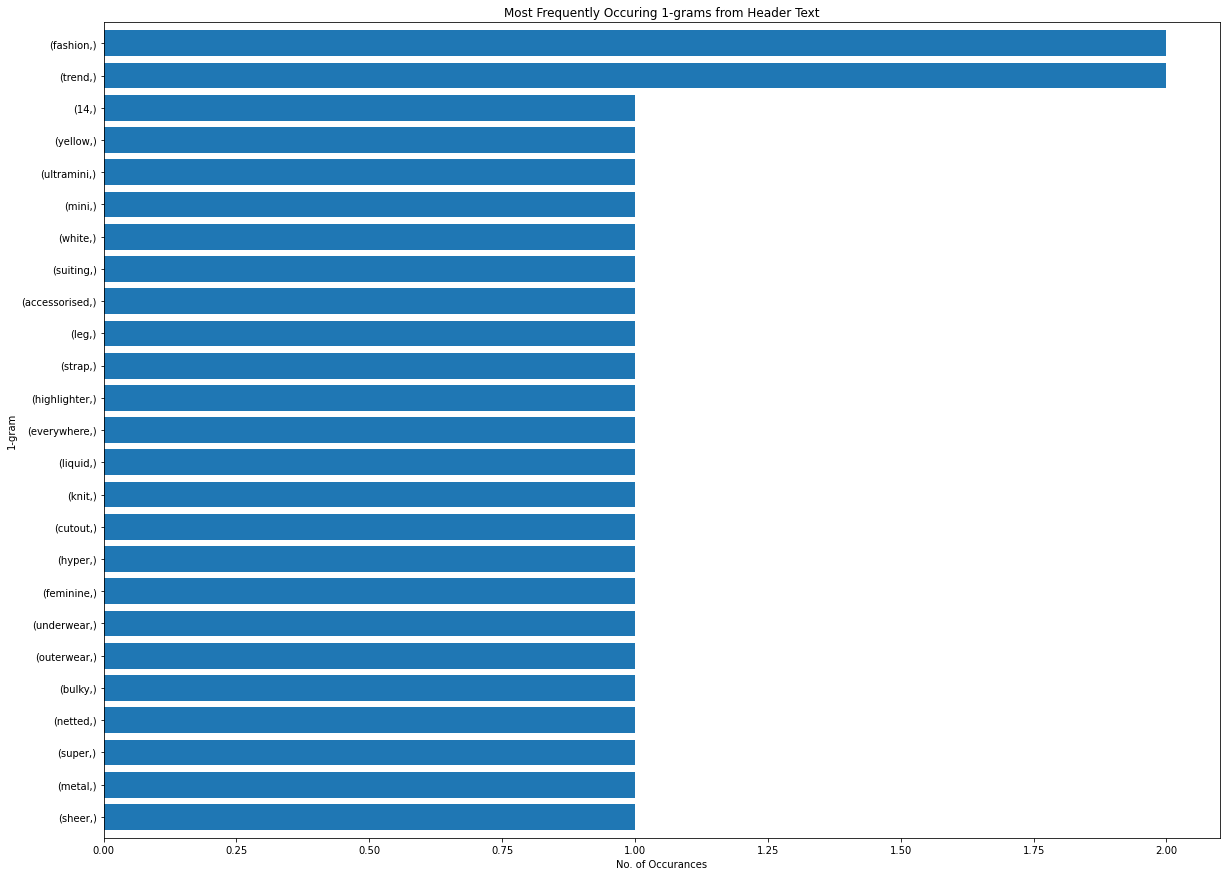

2-grams:
(fashion, trend)           2
(14, fashion)              1
(sheer, ultramini)         1
(ultramini, mini)          1
(mini, white)              1
(white, suiting)           1
(suiting, accessorised)    1
(accessorised, leg)        1
(leg, strap)               1
(strap, highlighter)       1
(highlighter, yellow)      1
(yellow, netted)           1
(netted, knit)             1
(knit, cutout)             1
(cutout, hyper)            1
(hyper, feminine)          1
(feminine, underwear)      1
(underwear, outerwear)     1
(outerwear, bulky)         1
(super, sheer)             1
(metal, super)             1
(liquid, metal)            1
(trend, youll)             1
(trend, everywhere)        1
(everywhere, soon)         1
dtype: int64


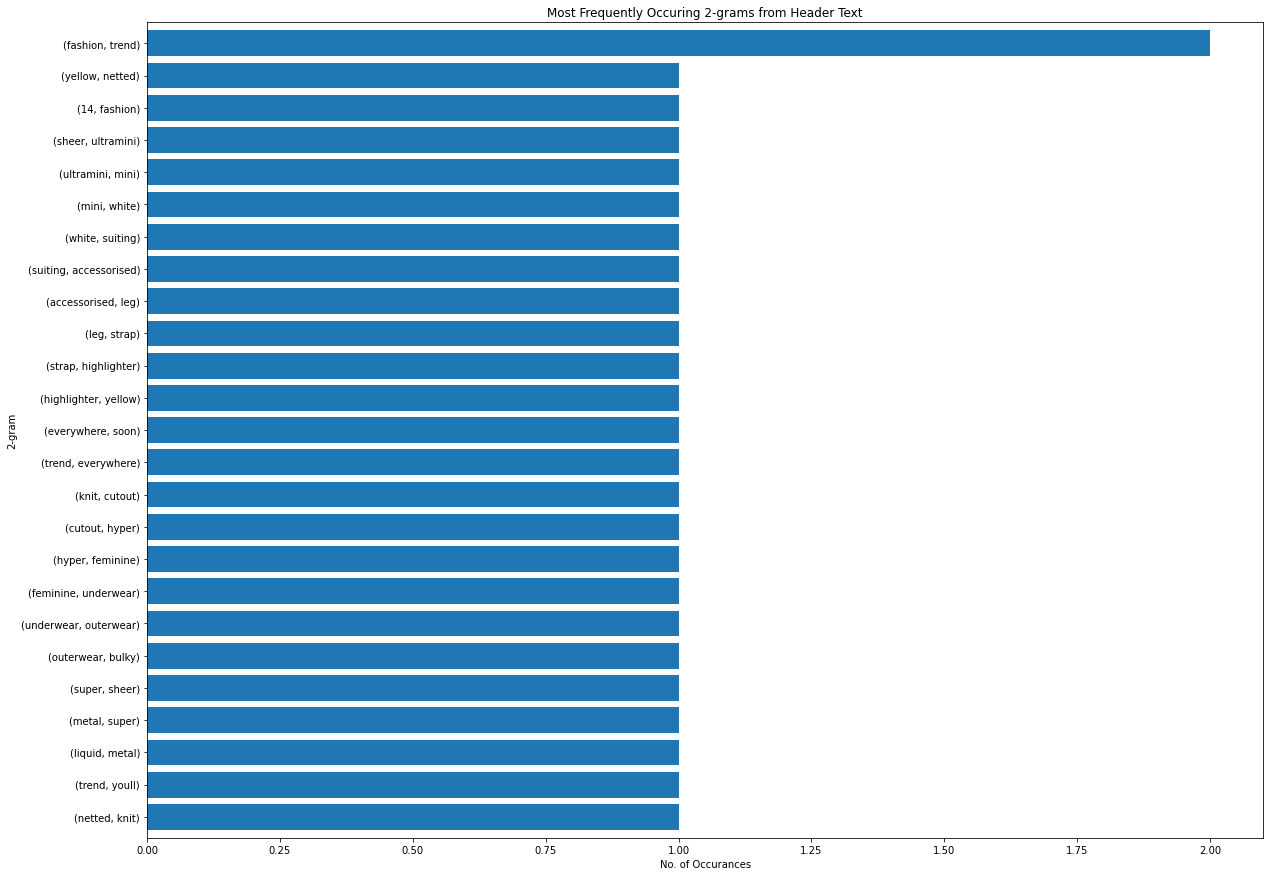

3-grams:
(14, fashion, trend)              1
(fashion, trend, everywhere)      1
(super, sheer, ultramini)         1
(sheer, ultramini, mini)          1
(ultramini, mini, white)          1
(mini, white, suiting)            1
(white, suiting, accessorised)    1
(suiting, accessorised, leg)      1
(accessorised, leg, strap)        1
(leg, strap, highlighter)         1
dtype: int64


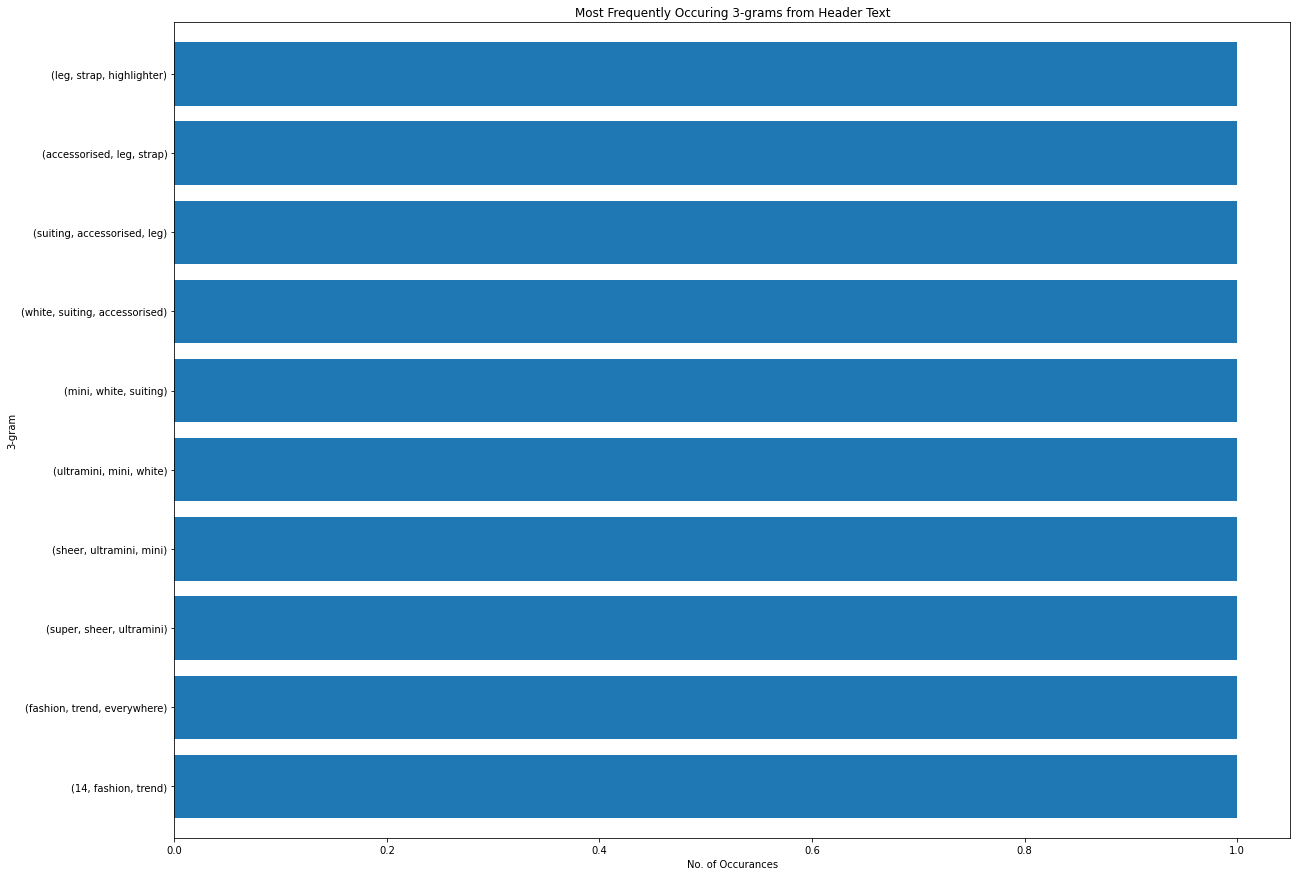

In [9]:
# ngrams based on header text
words = extract_words_from_text(text=" ".join(header_text))
find_ngrams(words=words, source="Header Text")

### Span Text

1-grams:
(fashion,)         9
(week,)            5
(teather,)         4
(charlie,)         4
(trend,)           2
(largechevron,)    2
(navigation,)      2
(menu,)            2
(uk,)              2
(gallery,)         2
(netted,)          1
(hyper,)           1
(cutout,)          1
(knit,)            1
(strap,)           1
(yellow,)          1
(highlighter,)     1
(underwear,)       1
(leg,)             1
(accessorised,)    1
(suiting,)         1
(white,)           1
(mini,)            1
(feminine,)        1
(country,)         1
dtype: int64


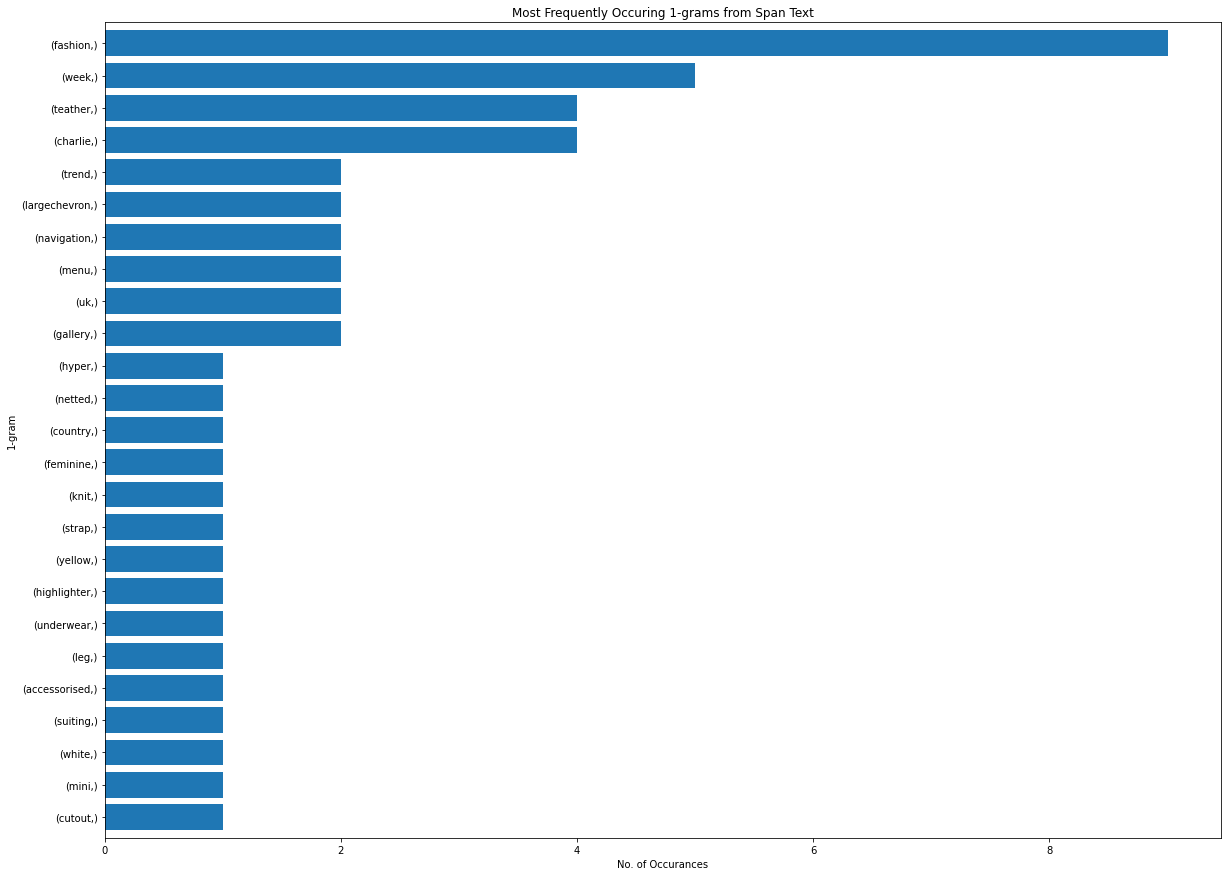

2-grams:
(fashion, week)            5
(charlie, teather)         4
(uk, largechevron)         2
(navigation, menu)         2
(teather, charlie)         2
(country, uk)              1
(netted, knit)             1
(outerwear, bulky)         1
(underwear, outerwear)     1
(feminine, underwear)      1
(hyper, feminine)          1
(cutout, hyper)            1
(knit, cutout)             1
(yellow, netted)           1
(bag, topic)               1
(highlighter, yellow)      1
(strap, highlighter)       1
(leg, strap)               1
(accessorised, leg)        1
(suiting, accessorised)    1
(white, suiting)           1
(mini, white)              1
(ultramini, mini)          1
(bulky, bag)               1
(trend, fashion)           1
dtype: int64


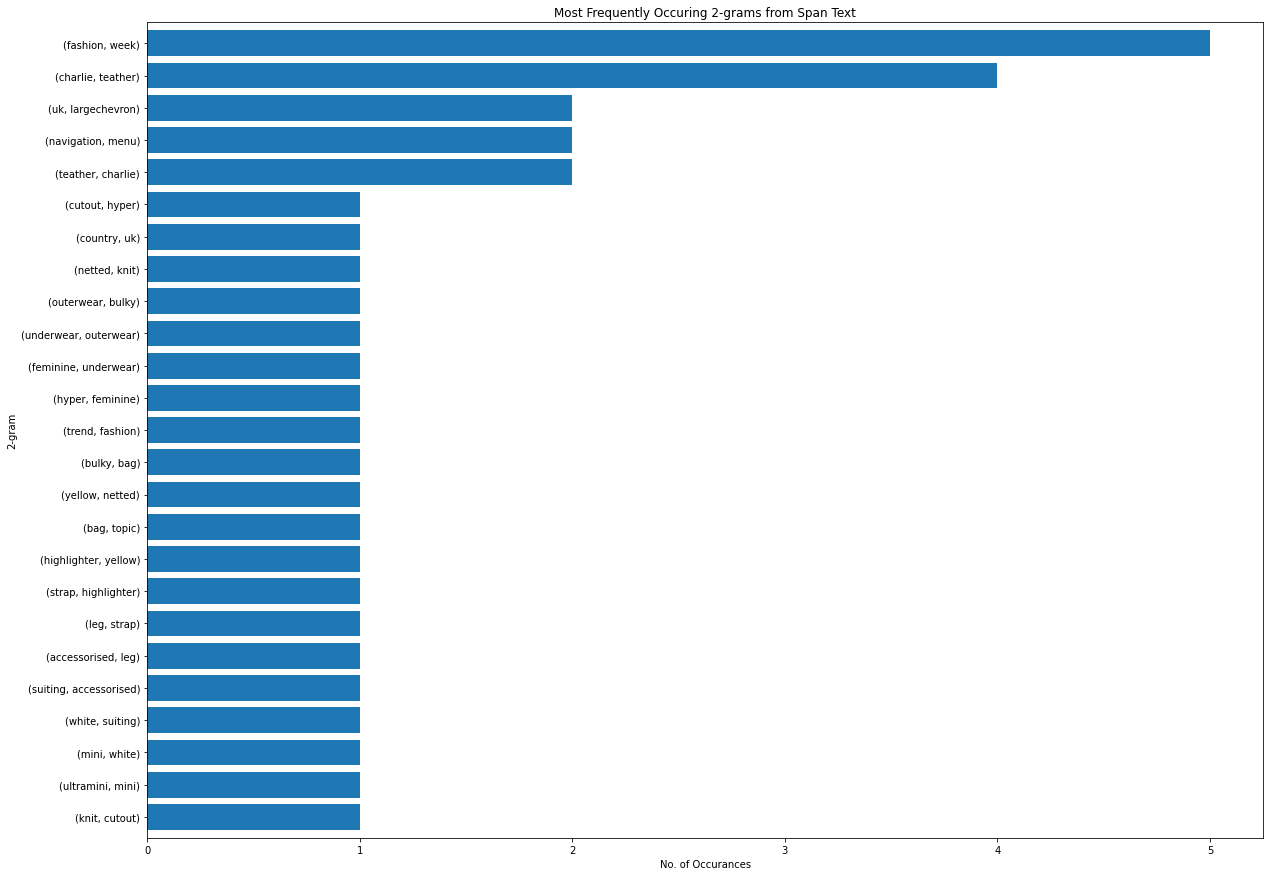

3-grams:
(teather, charlie, teather)         2
(charlie, teather, charlie)         2
(country, uk, largechevron)         1
(knit, cutout, hyper)               1
(topic, fashion, trend)             1
(bag, topic, fashion)               1
(bulky, bag, topic)                 1
(outerwear, bulky, bag)             1
(underwear, outerwear, bulky)       1
(feminine, underwear, outerwear)    1
dtype: int64


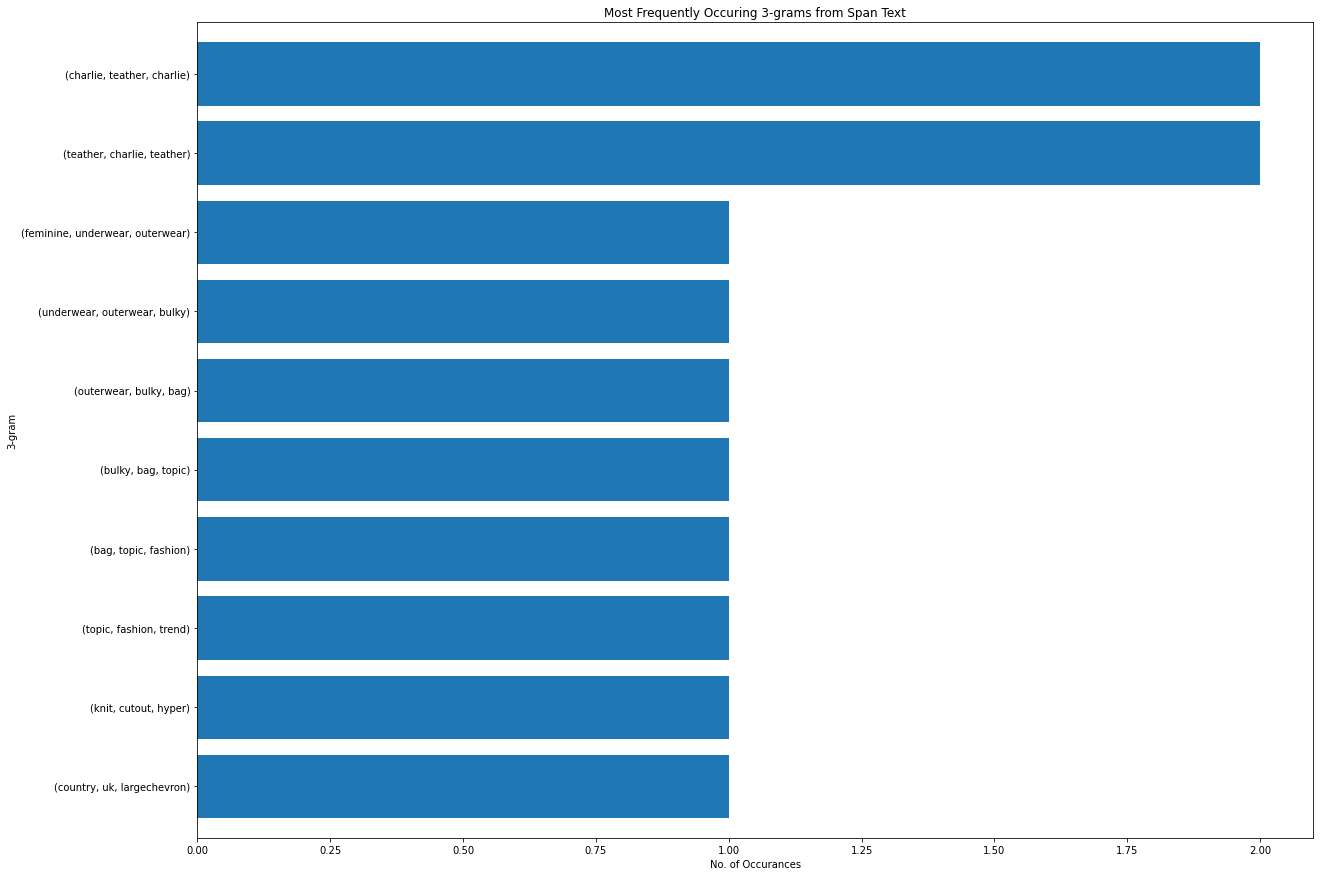

In [10]:
# ngrams based on span text
words = extract_words_from_text(text=" ".join(span_text))
find_ngrams(words=words, source="Span Text")